<h1><center>Final Project: Stroke Prediction Dataset</center></h1>

### Group 2: Ailin Sun, Cici Liu, Elena Wu-Ratner, Lawrence Chung, Mandy Wong

## Importing Data

Importing healthcare stroke dataset from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset csv and transforming it into a dataframe.

In [37]:
import pandas as pd

In [38]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [39]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Show a basic view of the dataframe including the number of stroke paitents, the number of non-stroke paitents, shape of the data frame, as well as the the number of nan values.

In [40]:
print ("Number of Stroke Paitents: " + str(len(df[df.stroke==1])))
print ("Number of Non-Stroke Paitents: " + str(len(df[df.stroke==0])))

Number of Stroke Paitents: 249
Number of Non-Stroke Paitents: 4861


In [41]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [42]:
df.shape

(5110, 12)

Create a new column for analysis by binning age to find the average BMI per age group. In order to clean the fill Nan values, the average BMI for each group bin is used to fill in Nan values at the respective age.  

In [43]:
labels = [1,2,3,4,5]
df["age_mean"] = pd.cut(df["age"], 5, labels=labels)
df["age_mean"].value_counts()

4    1245
3    1180
5     965
2     924
1     796
Name: age_mean, dtype: int64

In [44]:
grp_bmi = df.groupby("age_mean")["bmi"].mean()
grp_bmi

age_mean
1    20.787661
2    28.601332
3    31.425088
4    31.580618
5    29.415118
Name: bmi, dtype: float64

Function for inserting calculated BMI values for each age group into Nan where:
    <li> age group 1 = 20.7 BMI </li>
    <li >age group 2 = 28.6 BMI </li>
    <li> age group 3 = 31.4 BMI </li>
    <li> age group 4 = 31.6 BMI </li>
    <li> age group 5 = 29.4 BMI </li>

In [45]:
def bmi_val(cols):
    bmi = cols[0]
    age_mean = cols[1]
    
    if pd.isnull(bmi):
        if age_mean == 1:
            return 20.7
        elif age_mean == 2:
            return 28.6
        elif age_mean == 3:
            return 31.4
        elif age_mean == 4:
            return 31.6
        elif age_mean == 5:
            return 29.4
    else:
        return bmi
df["bmi"] = df[["bmi","age_mean"]].apply(bmi_val, axis=1)

In [46]:
df['Male'] = df.gender == 'Male'

df['Married'] = df.ever_married == 'Yes'

df['Urban_Residence'] = df.Residence_type == 'Urban'

df = pd.get_dummies(df,columns=['work_type','smoking_status'])

df.drop(['id','gender','ever_married','Residence_type','age_mean'], axis=1, inplace=True)

Create a copy of the cleaned dataframe and show the new values including number of stroke paitents, number of non-stroke patients, and the top 5 rows of the cleaned dataframe.

In [47]:
df_clean = df.copy()

In [48]:
print ("Number of Stroke Paitents: " + str(len(df_clean[df_clean.stroke==1])))
print ("Number of Non-Stroke Paitents: " + str(len(df_clean[df_clean.stroke==0])))

Number of Stroke Paitents: 249
Number of Non-Stroke Paitents: 4861


In [49]:
df_clean.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Married,Urban_Residence,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,True,True,0,0,1,0,0,0,1,0,0
1,61.0,0,0,202.21,31.6,1,False,True,False,0,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,True,True,False,0,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,False,True,True,0,0,1,0,0,0,0,0,1
4,79.0,1,0,174.12,24.0,1,False,True,False,0,0,0,1,0,0,0,1,0


## Binary Classification

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV


import warnings
warnings.filterwarnings('ignore')

Create the x and y training data set by spliting our total dataset into 30% test data and 70% training data.

In [51]:
X = df_clean.drop('stroke', axis=1)
y = df_clean.stroke

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

## Testing 5 Models

### Linear Discriminant Analysis

In [53]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_roc = scores['test_roc_auc'].mean()

### Quadratic Discriminant Analysis

In [54]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_roc = scores['test_roc_auc'].mean()

### Random Forest

In [55]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_roc = scores['test_roc_auc'].mean()

### K Neighbors Classifier

In [56]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

### Gaussian NB

In [57]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

### Comparing all the models.

In [58]:
models_initial = pd.DataFrame({
    'Model'       : ['Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'AUC_ROC'     : [LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,AUC_ROC
2,Random Forest,0.256394,0.025681,0.947999,0.474664,0.499263,0.798475
0,Linear Discriminant Analysis,0.010523,0.005934,0.944649,0.586846,0.518542,0.836742
3,K-Nearest Neighbors,0.004638,0.031167,0.942693,0.530034,0.506710,0.645855
4,Bayes,0.005286,0.006409,0.544032,0.542816,0.720408,0.805266
1,Quadratic Discriminant Analysis,0.006333,0.005860,0.446064,0.522888,0.584587,0.660723


Text(0, 0.5, 'Model')

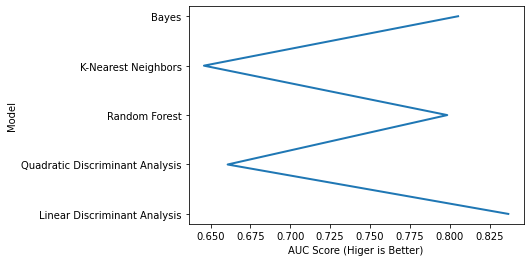

In [64]:
plt.plot(models_initial['AUC_ROC'], models_initial['Model'], linewidth=2)
plt.xlabel('AUC Score (Higer is Better)')
plt.ylabel('Model')

## SMOTE

Using SMOTE restructures the dataset to make it more even by using a statistical technique for increasing the number of cases in your dataset in a balanced way.

In [24]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X, y)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 249
Before OverSampling, counts of label '0': 4861 

After OverSampling, the shape of train_X: (9722, 17)
After OverSampling, the shape of train_y: (9722,) 

After OverSampling, counts of label '1': 4861
After OverSampling, counts of label '0': 4861


Retesting the 5 models from before but this time with dataset passed through SMOTE to balance the data.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.3, random_state=4)

### Linear Discriminant Analysis

In [26]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_roc = scores['test_roc_auc'].mean()

### Quadratic Discriminant Analysis 

In [27]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_roc = scores['test_roc_auc'].mean()

### Random Forest

In [28]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_roc = scores['test_roc_auc'].mean()

### K Neighbors Classifier

In [29]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()

KNN_roc = scores['test_roc_auc'].mean()

### Gaussian NB

In [30]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()

bayes_roc = scores['test_roc_auc'].mean()

### Comparing all the models

In [31]:
models_initial = pd.DataFrame({
    'Model'       : ['Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'AUC_ROC'     : [LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,AUC_ROC
2,Random Forest,0.516254,0.034807,0.965469,0.965793,0.965413,0.993572
0,Linear Discriminant Analysis,0.018476,0.005735,0.925348,0.931804,0.924988,0.977278
1,Quadratic Discriminant Analysis,0.016581,0.008976,0.906095,0.921476,0.905520,0.947097
3,K-Nearest Neighbors,0.007131,0.092055,0.880383,0.893627,0.880930,0.946746
4,Bayes,0.008029,0.006383,0.769146,0.810210,0.770229,0.929175


Text(0, 0.5, 'Model')

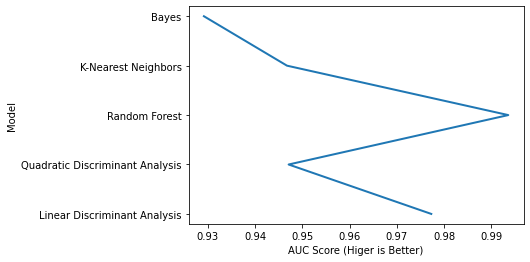

In [32]:
plt.plot(models_initial['AUC_ROC'], models_initial['Model'], linewidth=2)
plt.xlabel('AUC Score (Higer is Better)')
plt.ylabel('Model')